# Modelos Epidémicos
## Josué Juárez

# Modelo SIR
-----
Sean $S(t)$, $I(t)$ y $R(t)$ funciones dependientes del tiempo donde:

- $S(t)$ es la clase de susceptivos, contiene a los individuos sanos, pero, que pueden contraer la enfermedad.
- $I(t)$ es la clase conteniendo a los individuos infectados. Estos son considerados infecciosos y pueden transmitir la enfermedad a los individuos sanos.
- $R(t)$ contiene a los removidos; aquellos que ya contrajeron la enfermedad y no lo pueden hacer denuevo.

La suma de la población total en cualquier momento del tiempo es $N = S(t) + I(t) + R(t)$.

En epidemiología, el número de individuos infectados por unidad de tiempo es llamado _incidencia_. Y el cambio respecto al tiempo de la clase susceptiva esta dado por

$S'(t) = -\text{incidencia}$,

Concideremos un individuo infectado y asumimos lo siguiente:

- $cN$ es es el número de contactos que el individuo realiza. Se asume que el número de contactos es proporcional ($c$) a la población total.

- $S/N$ es la probabilidad de que el contacto sea con un individuo susceptible.

- $cN(S/N)$ es el número de contactos con individuos susceptibles que el individuo infectado realizó. Pero no necesariamente todos los contactos con estos individuos susceptibles resultan en contagio.

- Sea $p$ la probabilidad de que un contacto de un individuo susceptible con un infectado resulte en infección.

- $pcS$ es el número de individuos susceptibles que fuerón infectados por unidad de tiempo por individuo.

- $\beta SI$ es el número de individuos que se infectarón por unidad de tiempo (incidencia). Se fijó $\beta = pc$.

Con lo anterior se obtiene la ecuación diferencial

$S'(t) = - \beta IS$.

Los individuos susceptibles que se infectan son movidos a la clase $I$. Los individuos que se recuperan ~~(¿o mueren?)~~ dejan la clase de infectados a una constante de probabilidad per capita por unidad de tiempo $\alpha$, llamada cociente de recuperación. Y entonces, $\alpha I$ es el número de individuos infectatos por unidad de tiempo que se recuperan, asi

$I'(t) = \beta IS - \alpha I$.

Los individuos que se recuperan son movidos a la clase de recuperados

$R'(t) = \alpha I$.

El modelo SIR es el sistema de ecuaciones ordinarias

\begin{align}
S'(t) &= - \beta IS \\
I'(t) &= \beta IS - \alpha I \\
R'(t) &= \alpha I
\end{align}

con condiciones iniciales $S(0)$, $I(0)$ y $R(0)$.

Al sumar las ecuaciones diferenciales
$N'(t) = S'(t) + I'(t) + R'(t) = 0$,
por lo que $N = \text{cte}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
def SIR(Q,t):
    #regresa la derivada del vector Q
    S0, I0, R0 = Q[0], Q[1], Q[2]
    S_dot = -beta*I0*S0
    I_dot = beta*I0*S0 - alpha*I0
    R_dot = alpha*I0

    return S_dot, I_dot, R_dot

In [3]:
t = np.linspace(0, 300, num=10000)
#N = 10000
Q0 = [9000, 1000, 0] #condiciones iniciales

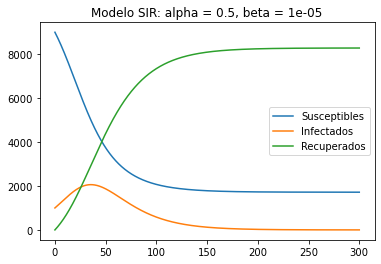

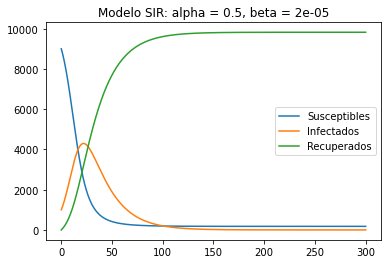

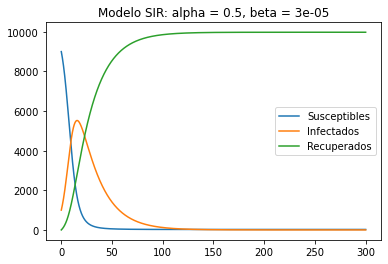

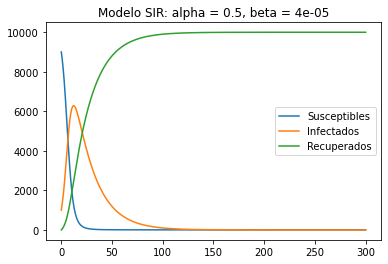

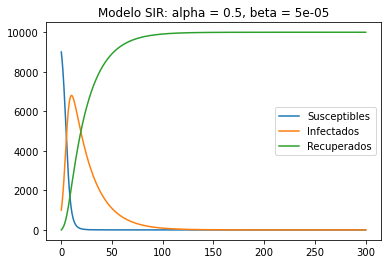

In [4]:
betas = [0.00001, 0.00002, 0.00003, 0.00004, 0.00005]

for b in betas:
    beta = b
    alpha = 0.05

    Q = integrate.odeint(SIR, Q0, t)
    S = Q[:,0]
    I = Q[:,1]
    R = Q[:,2]
    
    plt.figure()
    plt.plot(t, S, label = 'Susceptibles')
    plt.plot(t, I, label ='Infectados')
    plt.plot(t, R, label = 'Recuperados')
    plt.legend()
    plt.title('Modelo SIR: alpha = 0.5, beta = ' + str(b))

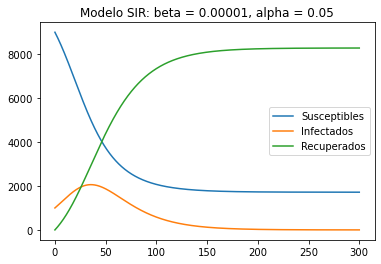

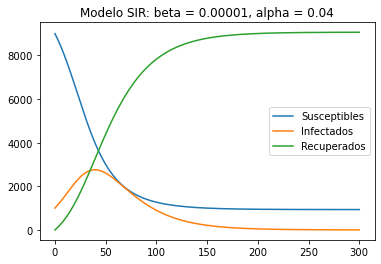

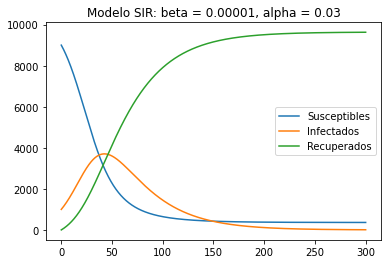

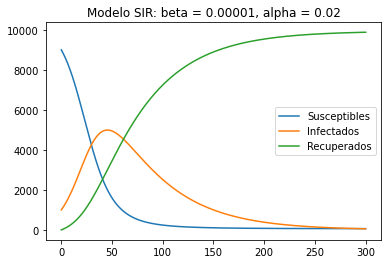

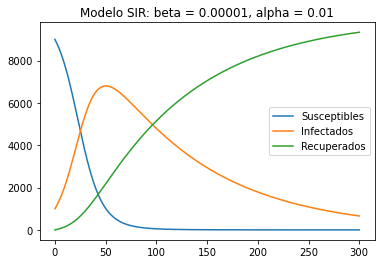

In [5]:
alphas = [0.05, 0.04, 0.03, 0.02, 0.01]

for a in alphas:
    beta = 0.00001
    alpha = a

    Q = integrate.odeint(SIR, Q0, t)
    S = Q[:,0]
    I = Q[:,1]
    R = Q[:,2]
    
    plt.figure()
    plt.plot(t, S, label = 'Susceptibles')
    plt.plot(t, I, label ='Infectados')
    plt.plot(t, R, label = 'Recuperados')
    plt.legend()
    plt.title('Modelo SIR: beta = 0.00001, alpha = ' + str(a))

Una forma de ver el error númerico es con la condición

$N = S(t) + I(t) + R(t)$

La gráfica de $N$ deberia de ser una recta en todo el intervalo de integración.

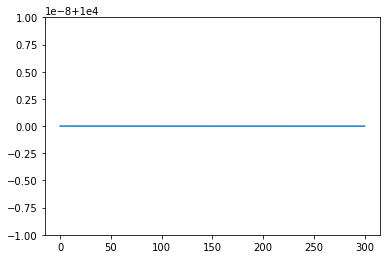

In [6]:
#N = np.zeros((Q.shape[0], 1))
N = S + I + R
plt.figure()
plt.plot(t, N)

In [7]:
N
#¿porque la gráfica sale en 0?

array([10000., 10000., 10000., ..., 10000., 10000., 10000.])

# Modelo SEIR
---

Un refinamiento al modelo SIR es agregar un compartimiento para los individuos expuestos a la enfermedad.
Sea $E(t)$ una función dependiente del tiempo asociada a los individuos expuestos que llevan consigo la enfermedad de forma latente, durante ese tiempo no transmiten la enfermedad.

El modelo SEIR esta dado por el sistema de ecuaciones diferenciales

\begin{align}
S'(t) &= - \beta IS \\
E'(t) &= \beta IS - \omega E \\
I'(t) &= \omega E - \alpha I \\
R'(t) &= \alpha I
\end{align}
con condiciones iniciales $S(0) > 0$, $E(0) \geq 0$, $I(0) > 0$, $R(0) \geq 0$ y donde $\omega$ es el cociente de incubación.
Al igual que en el modelo SIR, $N = S + E + I + R = \text{cte}$, como se puede ver.

In [8]:
def SEIR(Q,t):
    #regresa la derivada del vector Q
    S0, E0, I0, R0 = Q[0], Q[1], Q[2], Q[3]
    S_dot = -beta*I0*S0
    E_dot = beta*I0*S0 - omega*E0
    I_dot = omega*E0 - alpha*I0
    R_dot = alpha*I0

    return S_dot, E_dot, I_dot, R_dot

In [9]:
t = np.linspace(0, 300, num=10000)
#N = 10000
Q0 = [9000, 900, 100, 0] #condiciones iniciales

beta = 0.00002
alpha = 0.03
omega = 0.1

In [10]:
Q = integrate.odeint(SEIR, Q0, t)
S = Q[:,0]
E = Q[:,1]
I = Q[:,2]
R = Q[:,3]

Text(0.5, 1.0, 'Modelo SEIR')

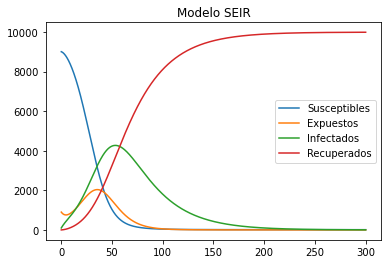

In [11]:
plt.figure()
plt.plot(t, S, label = 'Susceptibles')
plt.plot(t, E, label ='Expuestos')
plt.plot(t, I, label ='Infectados')
plt.plot(t, R, label = 'Recuperados')
plt.legend()
plt.title('Modelo SEIR')